In [160]:
# Kelas Prosaindata C
# Ketua
# NPM   200411100060 
# Nama  Alif Akbaril Amin
# Anggota
# NPM   200411100184
# Nama  Bagas Pratama Putra
# URL   https://github.com/noneneedme/kolaborasipro

In [136]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [138]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [139]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/ubuntu/.local/lib/python3.8/site-packages (1.2.2)
Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [142]:
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [143]:
training_set = pd.read_csv("air-line.csv")

In [144]:
df=training_set

In [145]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [146]:

training_set = df.iloc[:45, 1:2].values
test_set = df.iloc[45:, 1:2].values

In [147]:
training_set

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209]])

In [148]:
test_set

array([[191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
       [229],
       [242],
       [233],
       [267],
       [269],
       [270],
       [315],
       [364],
       [347],
       [312],
       [274],
       [237],
       [278],
       [284],
       [277],
       [317],
       [313],
       [318],
       [374],
       [413],
       [405],
       [355],
       [306],
       [271],
       [306],
       [315],
       [301],
       [356],
       [348],
       [355],
       [422],
       [465],
       [467],
       [404],
       [347],
       [305],
       [336],
       [340],
       [318],
       [362],
       [348],
       [363],
       [435],
       [491],
       [505],
      

In [149]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 45):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [150]:
xtrainbaru = np.reshape(X_train, (40, 5))

In [151]:
## KNN 
# Mengimpor kelas KNeighborsRegressor dari modul sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

# Membuat objek KNeighborsRegressor dengan parameter n_neighbors=3
neigh = KNeighborsRegressor(n_neighbors=3)

# Melatih model KNN dengan menggunakan data pelatihan xtrainbaru dan y_train
modelknn = neigh.fit(xtrainbaru, y_train)

In [152]:
# Definisikan dataset_train dan dataset_test
dataset_train = df.iloc[:45, 1:2]  # Menggunakan 45 baris pertama sebagai data latihan
dataset_test = df.iloc[45:, 1:2]  # Menggunakan baris setelah 45 sebagai data uji

# Menggabungkan dataset_train dan dataset_test
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)

# Mengambil input dari dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values

In [153]:
dataset_test

,Passengers
45,191
46,172
47,194
48,196
49,196
...,...
139,606
140,508
141,461
142,390


In [154]:
inputs = inputs.reshape(-1,1)

In [155]:

# Melakukan transformasi skalar pada data inputs
inputs = sc.fit_transform(inputs)

# Inisialisasi list untuk menyimpan data uji yang telah diolah
X_test = []

# Mengambil subset data sepanjang 5 nilai sebelumnya
for i in range(5, 24):
    X_test.append(inputs[i-4:i, 0])

# Mengubah list menjadi array NumPy
X_test = np.array(X_test)

# Mengubah bentuk array X_test menjadi (jumlah_sampel, panjang_waktu, 1)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Menampilkan bentuk dari X_test
print(X_test.shape)

(19, 4, 1)


In [156]:
xtestbaru = np.reshape(X_test, (19, 4))

In [157]:
xtestbaru

array([[0.10222222, 0.12888889, 0.15555556, 0.08222222],
       [0.12888889, 0.15555556, 0.08222222, 0.04222222],
       [0.15555556, 0.08222222, 0.04222222, 0.        ],
       [0.08222222, 0.04222222, 0.        , 0.04888889],
       [0.04222222, 0.        , 0.04888889, 0.05333333],
       [0.        , 0.04888889, 0.05333333, 0.05333333],
       [0.04888889, 0.05333333, 0.05333333, 0.14222222],
       [0.05333333, 0.05333333, 0.14222222, 0.14      ],
       [0.05333333, 0.14222222, 0.14      , 0.12666667],
       [0.14222222, 0.14      , 0.12666667, 0.15777778],
       [0.14      , 0.12666667, 0.15777778, 0.20444444],
       [0.12666667, 0.15777778, 0.20444444, 0.22222222],
       [0.15777778, 0.20444444, 0.22222222, 0.14444444],
       [0.20444444, 0.22222222, 0.14444444, 0.08666667],
       [0.22222222, 0.14444444, 0.08666667, 0.01777778],
       [0.14444444, 0.08666667, 0.01777778, 0.06444444],
       [0.08666667, 0.01777778, 0.06444444, 0.07111111],
       [0.01777778, 0.06444444,

In [158]:
df['Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

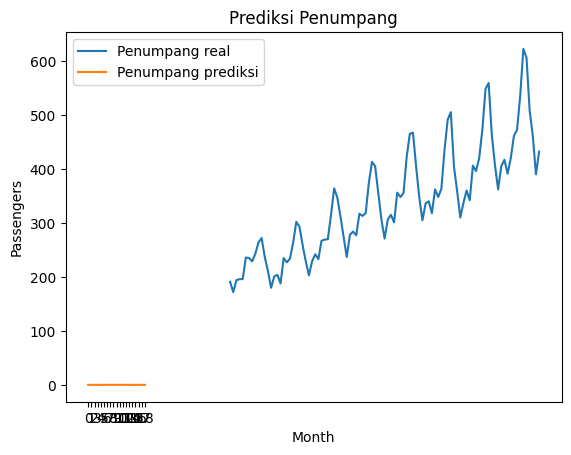

In [159]:
# Menampilkan plot data aktual (dataset_test) dan prediksi (prediksi)
plt.plot(dataset_test, label='Penumpang real')
plt.plot(prediksi, label='Penumpang prediksi')

# Menentukan lokasi sumbu x yang ditampilkan
plt.xticks(np.arange(0, 19, 1))

# Menambahkan judul plot
plt.title('Prediksi Penumpang')

# Menambahkan label sumbu x dan y
plt.xlabel('Month')
plt.ylabel('Passengers')

# Menampilkan legenda pada plot
plt.legend()

# Menampilkan plot
plt.show()